In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [8]:
file1=r'd:\dm\zhihu1.csv'
file2=r'd:\dm\zhihu2.csv'
comment1=pd.read_csv(file1,index_col=0)
comment2=pd.read_csv(file2,encoding='ANSI',index_col=0)

In [9]:
comment1.head()

,author,comment_count,content,created_time,excerpt,gender,headline,thanks_count,updated_time,voteup_count
No.,,,,,,,,,,
1,司马懿,424,<p>博士二年级的时候，我和导师帮助法国规制部门研究两家法国超市在某个区域的竞争政策问题。<...,1558478546,博士二年级的时候，我和导师帮助法国规制部门研究两家法国超市在某个区域的竞争政策问题。我说：「...,1.0,三国英雄士，四朝经济臣,783,1558514838,5127
2,吴域,37,<p>去美国访问，与纽约州藤校毕业的工程师聊天，他在赞扬中国经济发展和一带一路倡议的同时，表...,1558447794,去美国访问，与纽约州藤校毕业的工程师聊天，他在赞扬中国经济发展和一带一路倡议的同时，表达出对...,1.0,NaN,58,1558557354,333
3,Nash,10,<p>以下并非成熟想法，也只是针对当前问题的一点点抛砖，以供讨论。</p><p>======...,1558599566,以下并非成熟想法，也只是针对当前问题的一点点抛砖，以供讨论。================...,1.0,一个永远在学习路上的经济柠檬发考题与砖工,27,1558599957,144
4,排骨,0,<p>如果不从简单的华为来看，而从产业经济学的角度上看，其实主要的还是会让美国支出的成本变高...,1559550419,如果不从简单的华为来看，而从产业经济学的角度上看，其实主要的还是会让美国支出的成本变高。换句...,1.0,公众号“留学声”，育秀和cosimo日本语学校理事，咨询微信jptest-cn,3,1559550898,11
5,我在过马路,33,<p>更新:</p><p>今天美国怂了，无条件跟伊朗谈判，开心地被打脸。国际油价是涨不上去了...,1558456161,更新:今天美国怂了，无条件跟伊朗谈判，开心地被打脸。国际油价是涨不上去了。 中国的反制行为影...,1.0,知识有限的知识分子,50,1559565712,285


In [10]:
comment1.columns

Index(['author', 'comment_count', 'content', 'created_time', 'excerpt',
       'gender', 'headline', 'thanks_count', 'updated_time', 'voteup_count'],
      dtype='object')

In [11]:
column=[ 'comment_count','gender', 'thanks_count', 'voteup_count']

In [53]:
comment2=pd.concat((comment1,comment2),axis=0)

D:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [54]:
data1=comment1[column].copy()
data2=comment2[column].copy()

In [55]:
data1['gender'].fillna(value=0,inplace=True)
data2['gender'].fillna(value=0,inplace=True)

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
data11 = MinMaxScaler().fit_transform(data1)
data22 = MinMaxScaler().fit_transform(data2)
data1 = pd.DataFrame(data11,index=data1.index,columns=data1.columns)
data2 = pd.DataFrame(data22,index=data2.index,columns=data2.columns)

D:\python\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
D:\python\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


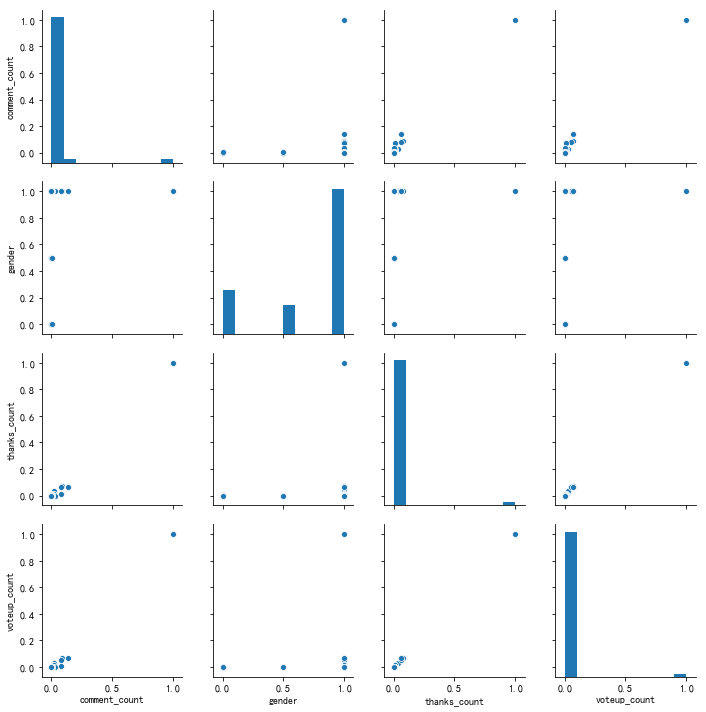

In [32]:
sns.pairplot(data1)

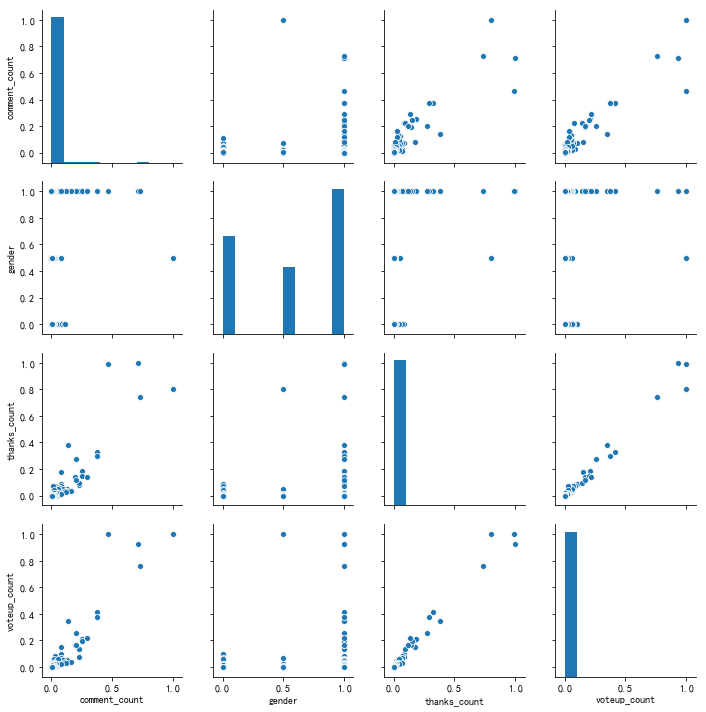

In [33]:
sns.pairplot(data2)

# 对data1聚类

In [34]:
from scipy.cluster import hierarchy  #层次聚类

In [35]:
#先计算距离矩阵，再聚类（类间距）
dis = hierarchy.distance.pdist(data1,'euclidean') 

In [36]:
clust = hierarchy.linkage(dis, method ='ward') 

In [37]:
##查看凝聚式聚类过程结果
print(clust.shape)
pd.DataFrame(data=clust,columns=['c1','c2','distance','counts']).tail()

(44, 4)


,c1,c2,distance,counts
39,8.0,83.0,0.097802,26.0
40,82.0,84.0,0.292055,29.0
41,72.0,73.0,1.341643,15.0
42,0.0,85.0,2.377947,30.0
43,86.0,87.0,3.594601,45.0


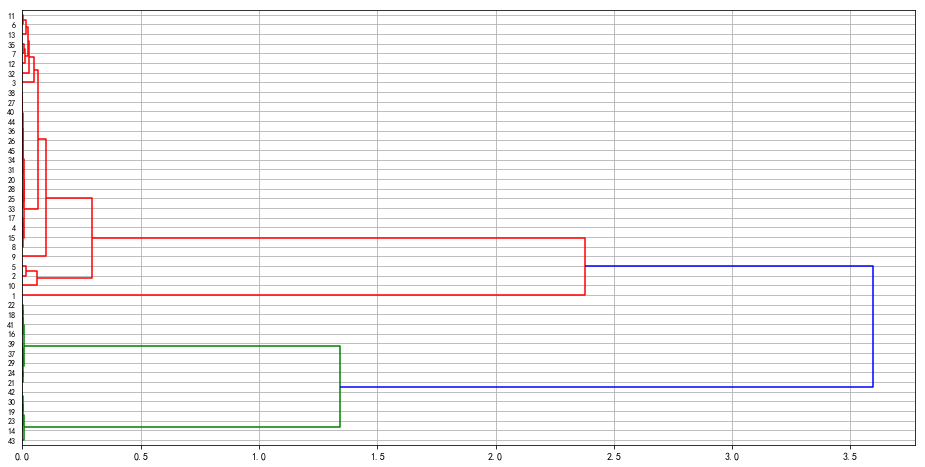

In [39]:
#画聚类层次图
plt.figure(figsize=(16,8))
p = hierarchy.dendrogram(clust,orientation='right',labels = data1.index)#orientation='right,left,bottom'
plt.grid()

可以看出聚成4类较为合适

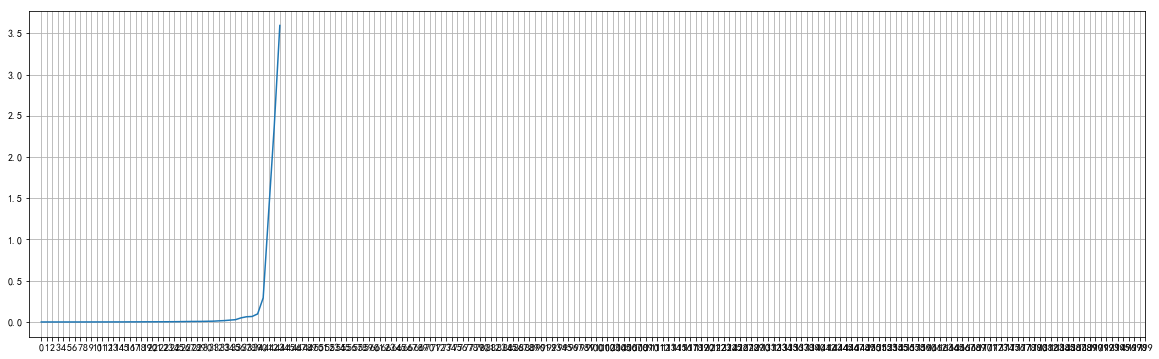

In [40]:
#聚类的类间距
plt.figure(figsize=(20,6))
plt.plot(clust[:,2])    
plt.xticks(range(0, 200))
plt.grid()

# 对data2进行k均值聚类

In [41]:
from sklearn.cluster import KMeans  #k均值聚类

In [51]:
#data2.drop(axis=1,columns='label',inplace=True)

In [58]:
k=4
kmeans = KMeans(n_clusters=k,init='k-means++')#init='k-means++'为选择初始质心的方法，同时需要指定调整次数max_iter=300(默认)
kmeans.fit(data2)#kmeans为训练好的聚类模型
label_k = kmeans.labels_ #获取各观测聚类标签
centroids = pd.DataFrame(kmeans.cluster_centers_ , columns=data2.columns)          #获取聚类中心,并转化为Dataframe
centroids

,comment_count,gender,thanks_count,voteup_count
0,0.005137,1.000000e+00,0.003748,0.003909
1,0.001602,-3.774758e-15,0.000763,0.000859
2,0.001366,5.000000e-01,0.000367,0.000408
3,0.726905,8.750000e-01,0.882428,0.922382


In [59]:
data2['label']=label_k
comment2['label']=label_k

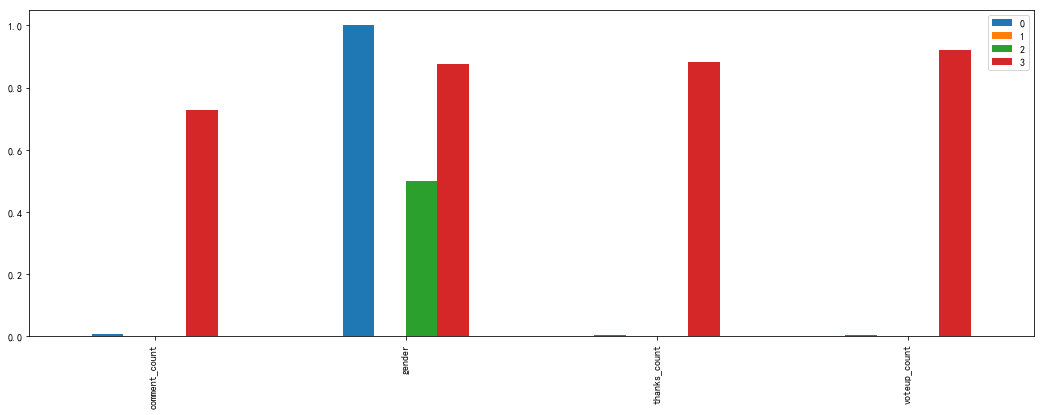

In [60]:
centroids.T.plot(kind='bar',figsize=(18,6))

D:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


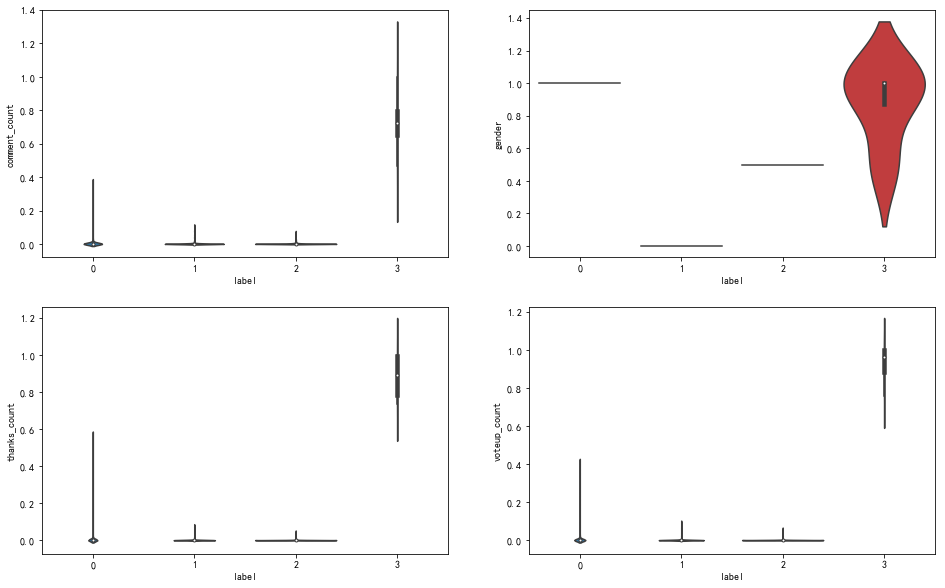

In [61]:
plt.figure(figsize=(16,10))
fnames = [ 'comment_count','gender', 'thanks_count', 'voteup_count']     #产生输入变量列表（列表生成式）
for i,c in enumerate(fnames):  #枚举型，产生元素本身和元素的编号，i为位置，c为元素本身
    plt.subplot(2,2,i+1)#2行2列，必须从1开始编号
    sns.violinplot(x='label',y=c,data=data2);

In [62]:
comment2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2725 entries, 1 to 2680
Data columns (total 11 columns):
author           2725 non-null object
comment_count    2725 non-null int64
content          2725 non-null object
created_time     2725 non-null int64
excerpt          2723 non-null object
gender           2365 non-null float64
headline         1646 non-null object
label            2725 non-null int32
thanks_count     2725 non-null int64
updated_time     2725 non-null int64
voteup_count     2725 non-null int64
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 244.8+ KB


In [64]:
comment2['label'].value_counts()

0    1284
1     854
2     583
3       4
Name: label, dtype: int64

In [83]:
#a = comment2[(comment2.label==2)].index.tolist()
#a=np.array(a)
#comment2.iloc[a]

In [89]:
a=comment2[comment2['label']==0]
b=comment2[comment2['label']==1]
c=comment2[comment2['label']==2]
d=comment2[comment2['label']==3]

去掉点赞量极高的评论

In [91]:
comment3=pd.concat((a,b),axis=0)

In [92]:
comment3=pd.concat((comment3,c),axis=0)

D:\python\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [130]:
#comment3.drop(axis=1,columns='label',inplace=True)

In [131]:
column2=[ 'comment_count', 'thanks_count', 'voteup_count']

In [146]:
data3=comment3[column2].copy()

In [147]:
data13 = MinMaxScaler().fit_transform(data3)

D:\python\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [148]:
data3 = pd.DataFrame(data13,index=data3.index,columns=data3.columns)

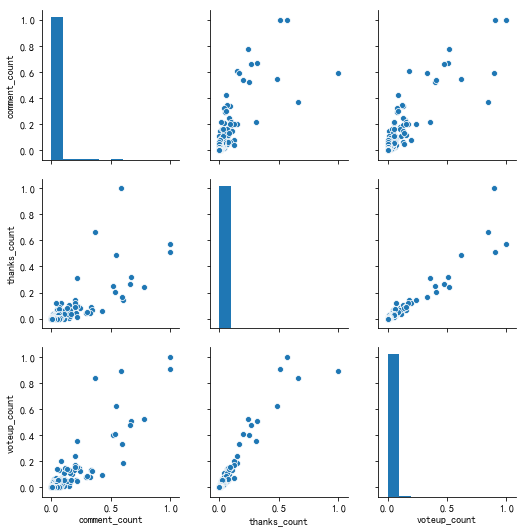

In [149]:
sns.pairplot(data3)

In [150]:
np.random.seed(1)
select = np.random.randint(2721,size=100)#只能取到[0,62997],刚好对应从0开始的行索引序号
select

array([1061,  235, 1096,  905,  960,  144,  129, 2556, 1202, 1300, 1278,
        357, 2516,  252,  668, 2446,  562, 2628,  753, 1527, 1888, 1110,
       2189, 2025, 1031,  319, 1337, 2561, 1920,  316, 2257, 1288,  728,
       2675,  431,  633, 2504,  542, 1095, 1411, 1478, 1337,  515,  497,
       1612, 1844, 1360, 2669,  883, 1321,   15, 2244,   25, 1495, 1927,
       1306, 1640, 1046, 1801, 1150, 1303,  155,  313, 2643,  648, 1312,
       1679,  243, 1372, 2634, 1214,  928, 1752, 1175,  695, 1345, 1393,
       1869, 1795, 1277,  461, 1798,  564,  469, 1478, 1538, 1612, 2197,
        715, 2311, 2125, 1099, 1067,  532, 1572,  871, 1799,  964, 2617,
       2258])

In [151]:
df=data3.iloc[select]

# 对去除极端值的样本抽样，进行层次聚类

In [152]:
#先计算距离矩阵，再聚类（类间距）
dis = hierarchy.distance.pdist(df,'euclidean') 
clust = hierarchy.linkage(dis, method ='ward')

In [153]:
##查看凝聚式聚类过程结果
print(clust.shape)
pd.DataFrame(data=clust,columns=['c1','c2','distance','counts']).tail()

(99, 4)


,c1,c2,distance,counts
94,191.0,192.0,0.030256,94.0
95,190.0,193.0,0.041246,4.0
96,65.0,195.0,0.101805,5.0
97,194.0,196.0,0.160795,99.0
98,60.0,197.0,0.291458,100.0


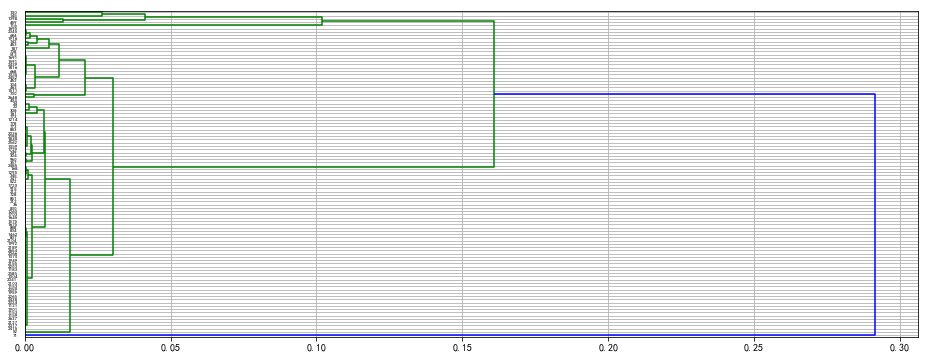

In [154]:
#画聚类层次图
plt.figure(figsize=(16,6))
p = hierarchy.dendrogram(clust,orientation='right',labels = df.index)   # orientation must be one of 'top', 'left', 'bottom', or 'right'
plt.grid()

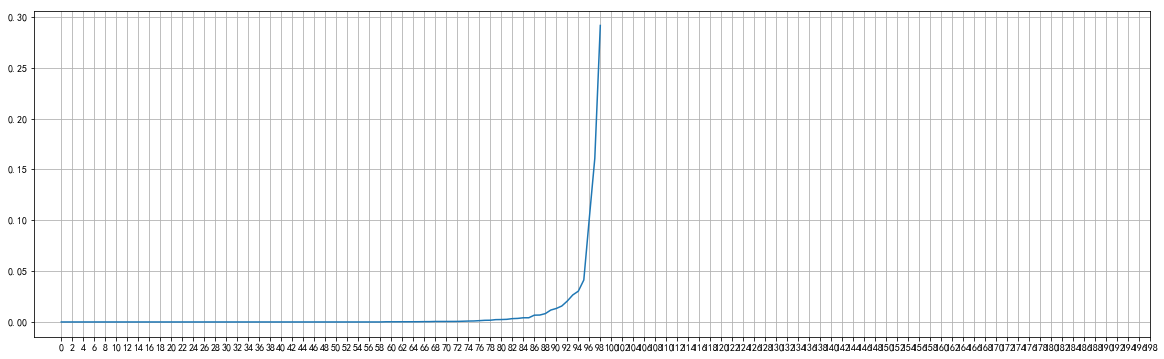

In [155]:
#聚类的类间距
plt.figure(figsize=(20,6))
plt.plot(clust[:,2])    
plt.xticks(np.arange(0, 199,2))
plt.grid()

### 聚成3类

# K均值聚类

In [172]:
k=9
kmeans = KMeans(n_clusters=k,init='k-means++')#init='k-means++'为选择初始质心的方法，同时需要指定调整次数max_iter=300(默认)
kmeans.fit(data3)#kmeans为训练好的聚类模型
label_k = kmeans.labels_ #获取各观测聚类标签
centroids = pd.DataFrame(kmeans.cluster_centers_ , columns=data3.columns)          #获取聚类中心,并转化为Dataframe
centroids

,comment_count,thanks_count,voteup_count
0,0.002439,0.000476,0.000660
1,0.702364,0.273308,0.501046
2,0.297945,0.054066,0.091624
3,0.997914,0.542146,0.951534
4,0.457580,0.573436,0.731259
5,0.167826,0.110430,0.164214
6,0.562587,0.190613,0.330718
7,0.063750,0.027511,0.037926
8,0.589708,1.000000,0.893828


5、7类算关注度中等，0类算关注度较低，其他类算关注度较高

In [171]:
#data3.drop(axis=1,columns='label',inplace=True) 

In [173]:
data3['label']=label_k 
comment3['label']=label_k 


In [174]:
comment3['label'].value_counts()

0    2624
7      61
5      15
2       9
6       4
1       3
3       2
4       2
8       1
Name: label, dtype: int64

In [192]:
a=comment3[comment3['label']==0]
b=comment3[comment3['label']==5]
bb=comment3[comment3['label']==7]
b=pd.concat((b,bb),axis=0)
c=comment3[comment3['label']==1]
clus=[2,3,4,6,8]
for i in clus:
    cc=comment3[comment3['label']==i]
    c=pd.concat((c,cc),axis=0)
c['label'].value_counts()

2    9
6    4
1    3
4    2
3    2
8    1
Name: label, dtype: int64

In [193]:
b['label'].value_counts()

7    61
5    15
Name: label, dtype: int64

In [194]:
for s in [a,b,c,d]:
    s=s.drop(axis=1,columns=['label'])



In [196]:
a.to_csv("点赞量较少的评论",index=False)
b.to_csv("点赞量中等的评论",index=False)
c.to_csv("点赞量很高的评论",index=False)
d.to_csv("点赞量极高的评论",index=False)

# 分词开始

In [8]:
import jieba
import codecs 

In [12]:
training1 = codecs.open(file1, u'rb',encoding= u'utf-8',errors='ignore')
content1=training1.read()
training2 = codecs.open(file2, u'rb',encoding= u'utf-8',errors='ignore')
content2=training2.read()

In [13]:
segment1 = []               #单个单词分组
segs = jieba.cut(content1)   # 使用jieba分词
for seg in segs:
    if len(seg) > 1 :
        segment1.append(seg)

In [14]:
segment2 = []               #单个单词分组
segs = jieba.cut(content2)   # 使用jieba分词
for seg in segs:
    if len(seg) > 1 :
        segment2.append(seg)

In [15]:
segment1

['No',
 'author',
 'comment',
 'count',
 'content',
 'created',
 'time',
 'excerpt',
 'gender',
 'headline',
 'thanks',
 'count',
 'updated',
 'time',
 'voteup',
 'count',
 '\r\n',
 '司马懿',
 '424',
 '博士',
 '二年级',
 '时候',
 '导师',
 '帮助',
 '法国',
 '规制',
 '部门',
 '研究',
 '两家',
 '法国',
 '超市',
 '某个',
 '区域',
 '竞争',
 '政策',
 '问题',
 '两家',
 '规模',
 '市场份额',
 '差不多',
 '数据',
 '显示',
 '他们',
 '市场份额',
 '分别',
 '21%',
 '19%',
 '基于',
 '这个',
 '市场份额',
 '我们',
 '根据',
 '货物',
 '成本',
 '定义',
 '他们',
 '最优',
 '定价',
 '问题',
 '这个',
 '时候',
 '导师',
 '一句',
 '如果',
 '这么',
 '市场份额',
 '竞争',
 '结果',
 '不是',
 '竞争',
 '前提',
 '现在',
 '想来',
 '这句',
 '同样',
 '适用',
 '理解',
 '华为',
 '乃至于',
 '中国',
 '相关',
 '产业',
 '产业链',
 '发展',
 '美国',
 '对华',
 '黑名单',
 '攻击',
 '公司',
 '层面',
 '专门',
 '叫做',
 'foreclosure',
 '这个',
 '金融',
 '里面',
 '其他',
 '含义',
 '但是',
 '产业',
 '经济学',
 '里面',
 '就是',
 '公司',
 '利用',
 '自己',
 '市场',
 '力量',
 '限制',
 '或者',
 '禁止',
 '自己',
 '竞争对手',
 '获得',
 '瓶颈',
 '访问',
 '行为',
 'figure',
 'data',
 'size',
 'normal',
 'img',
 'src',
 'https',
 'pic1',
 'zhimg',
 'com

In [16]:
# 转换成dataframe
words_df1 = pd.DataFrame({'segment1': segment1})
words_df2 = pd.DataFrame({'segment2': segment2})

In [21]:
freq1=words_df1['segment1'].value_counts()
freq2=words_df2['segment2'].value_counts()

In [32]:
freq1

美国      258
中国      205
华为      130
市场      110
技术      100
我们       91
一个       91
产业       83
没有       76
企业       68
自己       60
发展       59
就是       56
可能       55
因为       53
国家       53
这个       53
还是       51
国内       48
不是       48
现在       47
其实       46
影响       45
经济       45
问题       45
需要       43
公司       40
芯片       39
1.0      39
com      38
       ... 
全烧        1
工作效率      1
恶心        1
普遍意义      1
活追        1
没赚        1
保守政府      1
缓冲地带      1
天津        1
井冈山       1
疯人        1
新米国       1
某厂        1
石头砸       1
丫头        1
我国        1
淘汰        1
无能为力      1
综合国力      1
二十几个      1
推出        1
开工        1
小玩意       1
过关        1
现货        1
非农        1
女权        1
系统性       1
怎么回事      1
背后        1
Name: segment1, Length: 3693, dtype: int64

In [25]:
#DataFrame.drop(labels=None,axis=0, index=None, columns=None, inplace=False)
freq1.drop(axis=0,index='br',inplace=True)
freq1.drop(axis=0,index='但是',inplace=True)
freq1.drop(axis=0,index='如果',inplace=True)
freq1.drop(axis=0,index='可以',inplace=True)
freq1.drop(axis=0,index='empty',inplace=True)
freq1.drop(axis=0,index='ztext',inplace=True)
freq1.drop(axis=0,index='paragraph',inplace=True)
freq1.drop(axis=0,index='所以',inplace=True)
freq1.drop(axis=0,index='data',inplace=True)
freq1.drop(axis=0,index='class',inplace=True)
freq1.drop(axis=0,index='\r\n',inplace=True)
freq1.drop(axis=0,index='jpg',inplace=True)
freq1.drop(axis=0,index='com',inplace=True)

In [36]:
freq2

华为                                  8833
美国                                  3715
中国                                  3591
谷歌                                  3417
我们                                  2583
手机                                  2570
一个                                  2266
1.0                                 2107
系统                                  1993
自己                                  1924
国内                                  1878
市场                                  1836
normal                              1765
没有                                  1750
影响                                  1749
50                                  1729
国家                                  1509
现在                                  1489
就是                                  1462
服务                                  1433
Google                              1431
这个                                  1421
不是                                  1410
用户                                  1296
公司              

In [35]:
freq2.drop(axis=0,index='br',inplace=True)
freq2.drop(axis=0,index='但是',inplace=True)
freq2.drop(axis=0,index='如果',inplace=True)
freq2.drop(axis=0,index='可以',inplace=True)
freq2.drop(axis=0,index='empty',inplace=True)
freq2.drop(axis=0,index='ztext',inplace=True)
freq2.drop(axis=0,index='paragraph',inplace=True)
freq2.drop(axis=0,index='所以',inplace=True)
freq2.drop(axis=0,index='data',inplace=True)
freq2.drop(axis=0,index='class',inplace=True)
freq2.drop(axis=0,index='\r\n',inplace=True)
freq2.drop(axis=0,index='jpg',inplace=True)
freq2.drop(axis=0,index='com',inplace=True)
freq2.drop(axis=0,index='https',inplace=True)
freq2.drop(axis=0,index='v2',inplace=True)
freq2.drop(axis=0,index='zhimg',inplace=True)
freq2.drop(axis=0,index='figure',inplace=True)
freq2.drop(axis=0,index='size',inplace=True)
freq2.drop(axis=0,index='src',inplace=True)
freq2.drop(axis=0,index='hd',inplace=True)

In [37]:
from wordcloud import WordCloud,ImageColorGenerator
from matplotlib import pyplot as plt
from PIL import Image

In [47]:
wc = WordCloud(font_path="msyh.ttc",background_color="black",max_words=100000,max_font_size=300,
              width=2500,height=2500).generate(content2)

In [39]:
wc

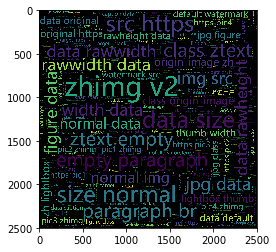

In [48]:
plt.imshow(wc)

In [43]:
type(content1)

str